In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
imPath = '../Images/cats.png'
img = cv2.imread(imPath);
grayImg = '../Images/albert-einstein_gray.jpg'
I_gray = cv2.imread(grayImg, cv2.IMREAD_GRAYSCALE)
fruit = '../Images/fruit-trees.jpg'
I_circles = cv2.imread(fruit, cv2.IMREAD_GRAYSCALE)
juggler = '../Images/juggler.png'
I_balls = cv2.imread(fruit, cv2.IMREAD_GRAYSCALE)

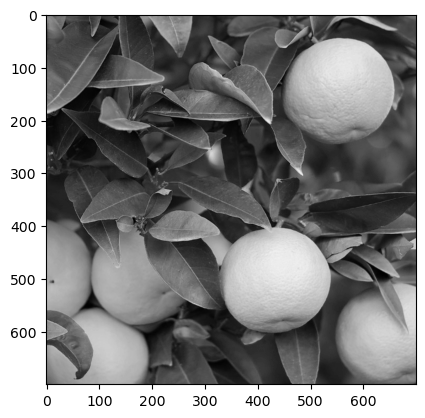

In [5]:
plt.imshow(I_circles,cmap = 'gray');

In [6]:
def f_getExtents(a,b,numRows,numCols):
    # print('Starting')
    r1 = int(0)
    c1 = int(a*r1 + b)
    r2 = int(numRows - 1)
    c2 = int(a*r2+b)
    # print('Ending')
    return (c1,r1),(c2,r2)

# Hough Lines

In [21]:
def f_houghLines(E):
    # Getting all angles within (0,360)
    angles = np.deg2rad(np.arange(360))
    numRows, numCols = E.shape[0], E.shape[1]
    dMax = int((numRows**2 + numCols **2)**.5)
    H = np.zeros((dMax,len(angles)))
    idx = np.argwhere(E)
    r , c = idx[:,0],idx[:,1]
    for i in range(len(r)):
        for ang in angles:
            ri,ci = r[i],c[i]
            di = int(ri*np.cos(ang) + ci*np.sin(ang))
            if di > 0 and di < dMax:
                H[di,int(np.rad2deg(ang))] += 1
    return H

In [22]:
E = cv2.Canny(I_circles,125,130)
E = E>100

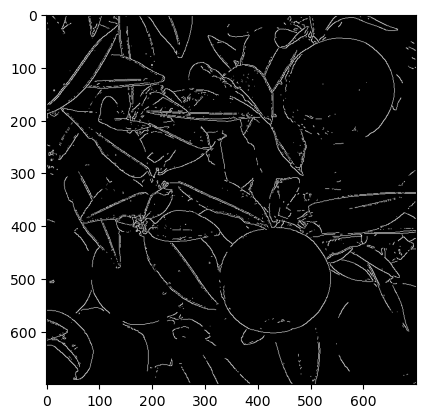

In [23]:
plt.imshow(E,cmap='gray')

In [24]:
H = f_houghLines(E)

In [27]:
idx = np.argwhere(H==H.max())
best_d,best_theta = idx[0,0],idx[0,1]

In [28]:
best_d,best_theta

(172, 334)

In [29]:
theta = np.deg2rad(best_theta)
a = -(1/np.tan(theta))
b = best_d/np.sin(theta)

In [30]:
a,b

(2.0503038415792942, -392.36158962523547)

# Drawing Lines on Image

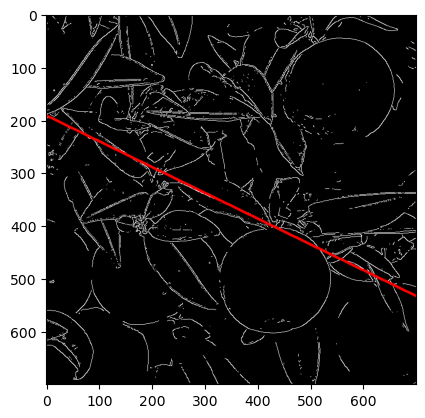

In [33]:
s,e = f_getExtents(a,b,E.shape[0],E.shape[1])
E2 = np.zeros((E.shape[0],E.shape[1],3),dtype=np.uint8)
E3 = np.array(255*E,np.uint8)
# Converting back from (0,1) to (0,255)
# E3[E3==0] = 255
E2[:,:,0] = E3
E2[:,:,1] = E3
E2[:,:,2] = E3
# plt.imshow(E2)
I = cv2.line(E2,s,e,(0,0,255),3)
plt.imshow(I[:,:,::-1])

In [35]:
def nlargest_indicies(arr,n):
    uniques = np.unique(arr)
    threshold = uniques[-n]
    return np.where(arr >= threshold)

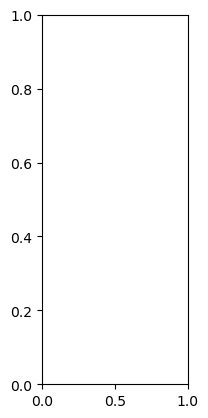

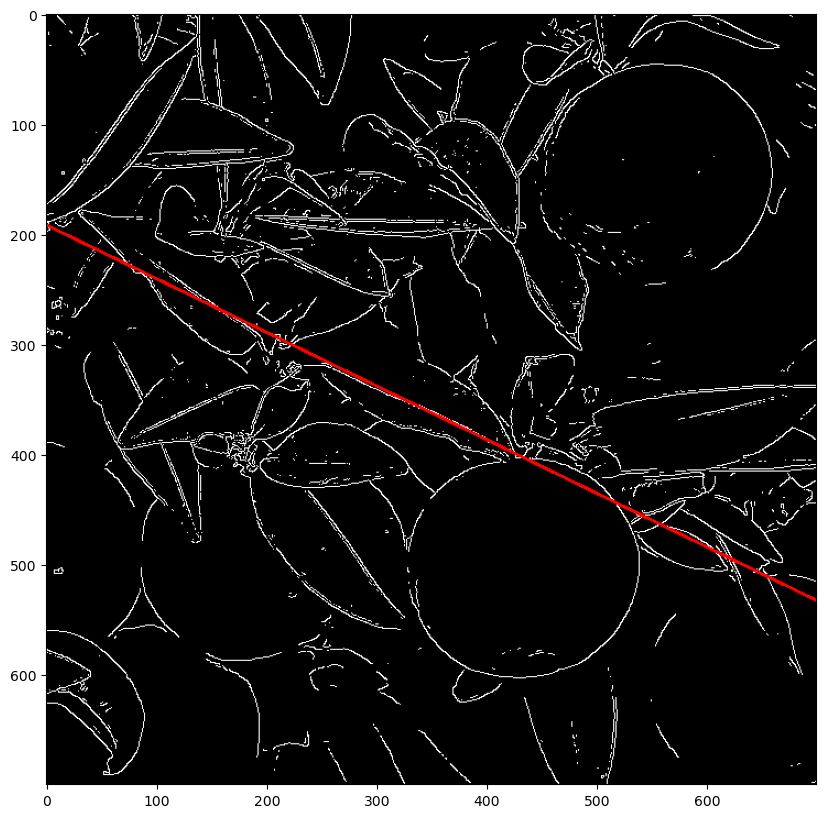

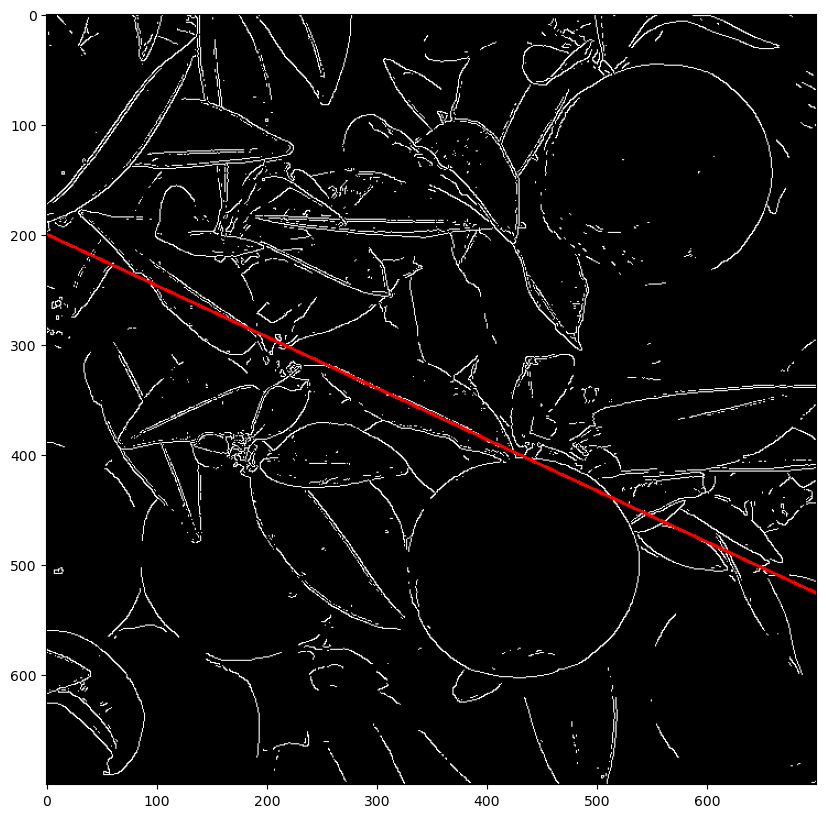

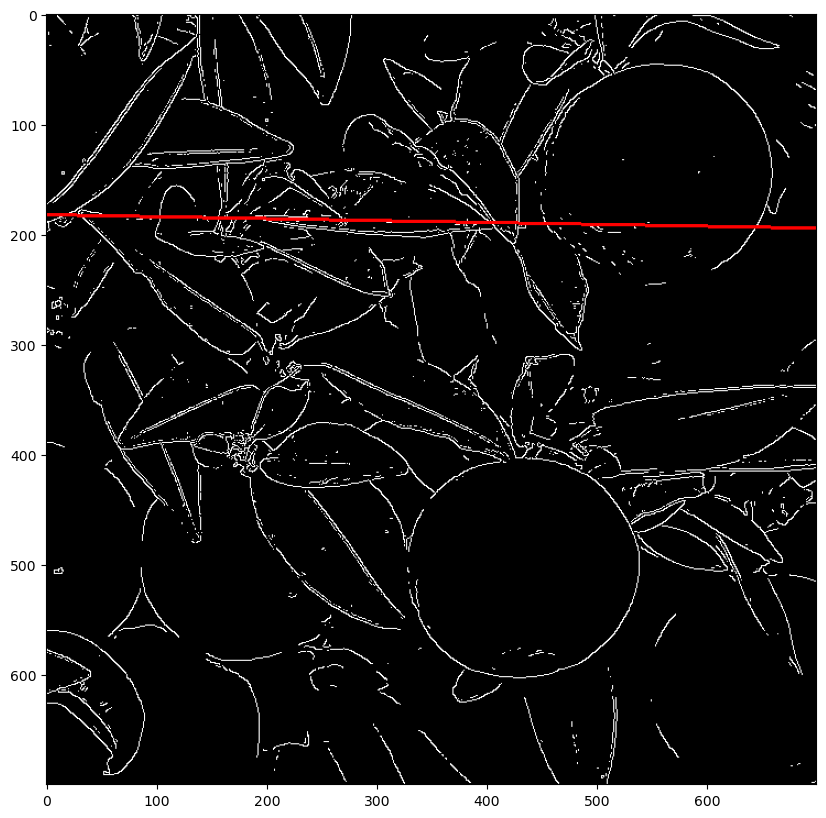

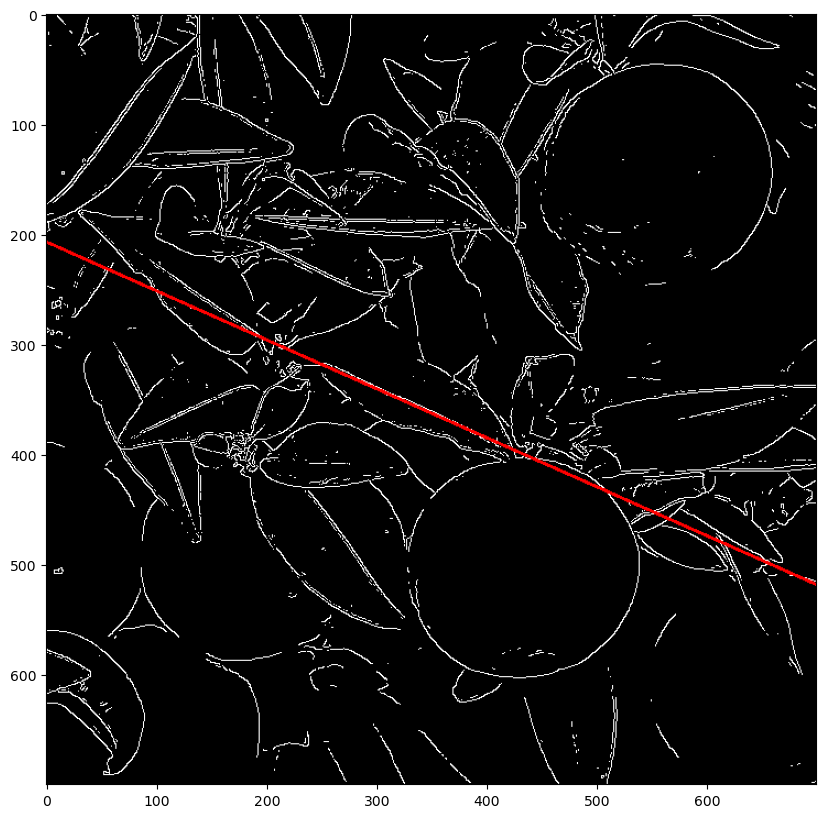

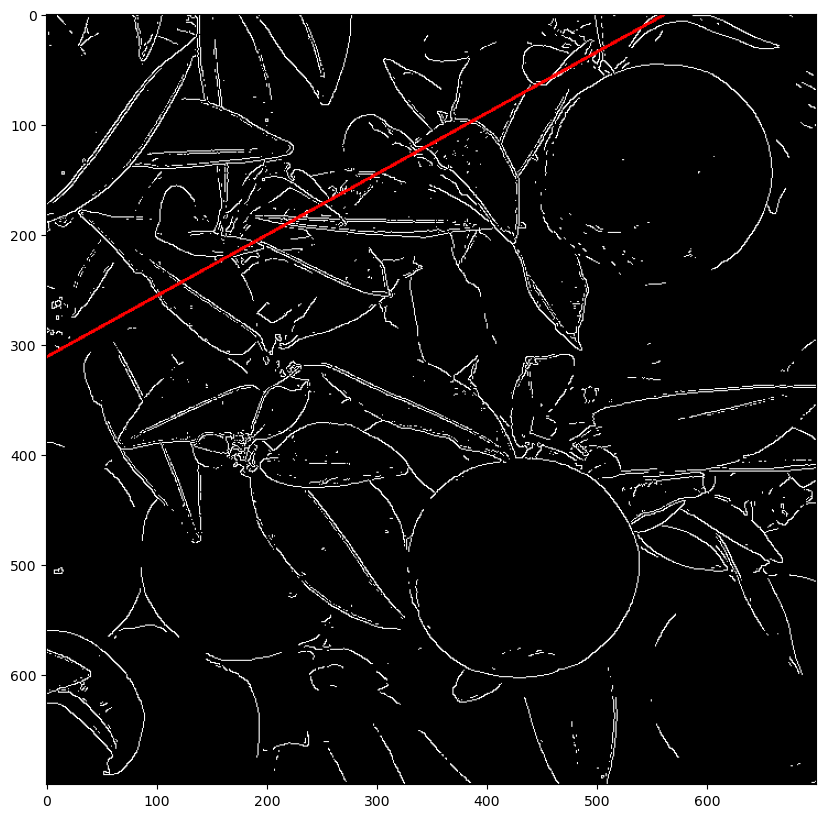

In [36]:
n = 5
x,y = nlargest_indicies(H,n)
plt.subplot(131)
for i in range(n):
    best_d,best_theta = x[i],y[i]
    theta = np.deg2rad(best_theta)
    a = -(1/np.tan(theta))
    b = best_d/np.sin(theta)

    s,e = f_getExtents(a,b,E.shape[0],E.shape[1])
    E2 = np.zeros((E.shape[0],E.shape[1],3),dtype=np.uint8)
    E3 = np.array(255*E,np.uint8)
    # Converting back from (0,1) to (0,255)
    # E3[E3==0] = 255
    E2[:,:,0] = E3
    E2[:,:,1] = E3
    E2[:,:,2] = E3
    # plt.imshow(E2)
    I = cv2.line(E2,s,e,(0,0,255),2)
    fig,ax = plt.subplots(figsize=(18,10))
    ax.imshow(I[:,:,::-1])

# Circles Using Hough Transform

In [40]:
def f_houghCircles(E):
    numRows, numCols = E.shape[0], E.shape[1]
    dMax = int((numRows**2 + numCols **2)**.5)
    H = np.zeros((numRows,numCols,dMax))
    idx = np.argwhere(E)
    r , c = idx[:,0],idx[:,1]
    for i in range(len(r)):
        for a in range(numRows):
            for b in range(numCols):
                ri,ci = r[i],c[i]
                di = int((((ri-a)**2 + (ci-b)**2))**.5)
                if di > 0 and di < dMax:
                    H[a,b,di] += 1
    return H

In [ ]:
H = f_houghCircles(E)

In [ ]:
idx = np.argwhere(H==H.max)
best_cr,best_cc,best_d = idx[0,0],idx[0,1],idx[0,2]

In [ ]:
E2 = np.zeros((E.shape[0],E.shape[1],3),dtype=np.uint8)
E3 = np.array(255*E,np.uint8)
# Converting back from (0,1) to (0,255)
# E3[E3==0] = 255
E2[:,:,0] = E3
E2[:,:,1] = E3
E2[:,:,2] = E3
# plt.imshow(E2)
I = cv2.circle(E2,(int(best_cc),int(best_cr)),int(best_d),(0,0,255),2)
plt.imshow(I[:,:,::-1])

In [ ]:
n = 5
x,y,z = nlargest_indicies(H,n)
plt.subplot(131)
for i in range(n):
    best_cr,best_cc,best_d = x[i],y[i],z[i]
    E2 = np.zeros((E.shape[0],E.shape[1],3),dtype=np.uint8)
    E3 = np.array(255*E,np.uint8)
    # Converting back from (0,1) to (0,255)
    # E3[E3==0] = 255
    E2[:,:,0] = E3
    E2[:,:,1] = E3
    E2[:,:,2] = E3
    # plt.imshow(E2)
    I = cv2.circle(E2,int(best_cc),int(best_cr),int(best_d),(0,0,255),2)
    fig,ax = plt.subplots(figsize=(9,5))
    ax.imshow(I[:,:,::-1])

In [ ]:
E = cv2.Canny(I_balls,125,130)
E = E>100

In [ ]:
plt.imshow(E,cmap='gray')

In [ ]:
H = f_houghCircles(E)

In [ ]:
idx = np.argwhere(H==H.max)
best_cr,best_cc,best_d = idx[0,0],idx[0,1],idx[0,2]

In [ ]:
E2 = np.zeros((E.shape[0],E.shape[1],3),dtype=np.uint8)
E3 = np.array(255*E,np.uint8)
# Converting back from (0,1) to (0,255)
# E3[E3==0] = 255
E2[:,:,0] = E3
E2[:,:,1] = E3
E2[:,:,2] = E3
# plt.imshow(E2)
I = cv2.circle(E2,(int(best_cc),int(best_cr)),int(best_d),(0,0,255),2)
plt.imshow(I[:,:,::-1])

In [ ]:
n = 5
x,y,z = nlargest_indicies(H,n)
plt.subplot(131)
for i in range(n):
    best_cr,best_cc,best_d = x[i],y[i],z[i]
    E2 = np.zeros((E.shape[0],E.shape[1],3),dtype=np.uint8)
    E3 = np.array(255*E,np.uint8)
    # Converting back from (0,1) to (0,255)
    # E3[E3==0] = 255
    E2[:,:,0] = E3
    E2[:,:,1] = E3
    E2[:,:,2] = E3
    # plt.imshow(E2)
    I = cv2.circle(E2,int(best_cc),int(best_cr),int(best_d),(0,0,255),2)
    fig,ax = plt.subplots(figsize=(9,5))
    ax.imshow(I[:,:,::-1])